Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process
import warnings
warnings.simplefilter("ignore")

C:\Users\salma\AppData\Roaming\Python\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


-------------------------------------------------
Loading Dataset

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [3]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


---------------------------------------------------
Dropping Unnwanted Columns

In [4]:
df.drop(columns = ['Overview', 'Poster_Url'] , inplace=True)

In [5]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,7.6,en,"Drama, Crime"
9823,2020-10-01,Violent Delights,13.356,8,3.5,es,Horror
9824,2016-05-06,The Offering,13.355,94,5.0,en,"Mystery, Thriller, Horror"
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,en,"Music, Drama, History"


------------------------------------------------------------
Creating Release_Year Column & Dropping Release_Date Column

In [6]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Year'] = df['Release_Date'].dt.year

In [7]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,7.6,en,"Drama, Crime",1973
9823,2020-10-01,Violent Delights,13.356,8,3.5,es,Horror,2020
9824,2016-05-06,The Offering,13.355,94,5.0,en,"Mystery, Thriller, Horror",2016
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,en,"Music, Drama, History",2021


In [8]:
df.drop(columns = 'Release_Date', inplace=True)

In [9]:
df

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,6.3,en,Thriller,2022
3,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...
9822,Badlands,13.357,896,7.6,en,"Drama, Crime",1973
9823,Violent Delights,13.356,8,3.5,es,Horror,2020
9824,The Offering,13.355,94,5.0,en,"Mystery, Thriller, Horror",2016
9825,The United States vs. Billie Holiday,13.354,152,6.7,en,"Music, Drama, History",2021


-----------------------------------------
Getting Some Info About Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              9827 non-null   object 
 1   Popularity         9827 non-null   float64
 2   Vote_Count         9827 non-null   int64  
 3   Vote_Average       9827 non-null   float64
 4   Original_Language  9827 non-null   object 
 5   Genre              9827 non-null   object 
 6   Release_Year       9827 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 499.2+ KB


In [11]:
df.describe()

,Popularity,Vote_Count,Vote_Average,Release_Year
count,9827.000000,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534,2006.203623
std,108.873998,2611.206907,1.129759,15.685554
min,13.354000,0.000000,0.000000,1902.000000
25%,16.128500,146.000000,5.900000,2000.000000
50%,21.199000,444.000000,6.500000,2011.000000
75%,35.191500,1376.000000,7.100000,2017.000000
max,5083.954000,31077.000000,10.000000,2024.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Release_Year         0
dtype: int64

--------------------------------------------------------------------------------
Question 1: What is the movie with the highest popularity rate? What kind is it?

In [14]:
top_10_popular_movies = df.sort_values('Popularity', ascending=False).head(10)
top_10_popular_movies

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,6.3,en,Thriller,2022
3,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",2021
5,The Commando,1750.484,33,6.6,en,"Action, Crime, Thriller",2022
6,Scream,1675.161,821,6.8,en,"Horror, Mystery, Thriller",2022
7,Kimi,1601.782,206,6.3,en,Thriller,2022
8,Fistful of Vengeance,1594.013,114,5.3,en,"Action, Crime, Fantasy",2022
9,Eternals,1537.406,4726,7.2,en,Science Fiction,2021


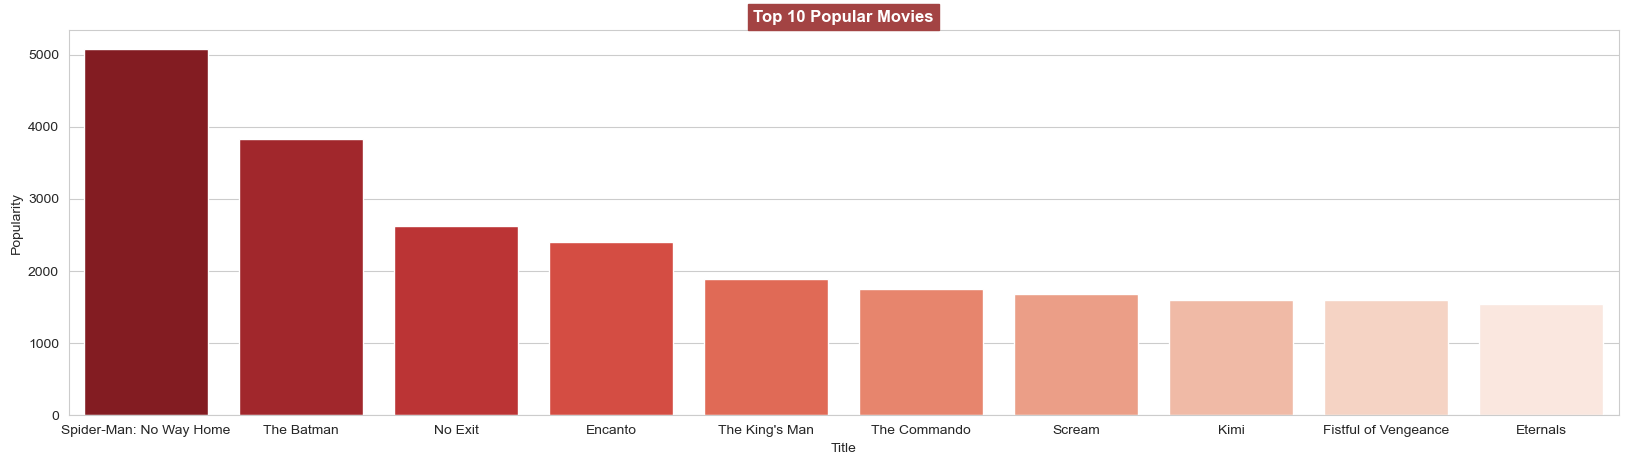

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.barplot(x='Title', y='Popularity', data=top_10_popular_movies, palette='Reds_r')
plt.title('Top 10 Popular Movies', fontweight='bold',backgroundcolor='#A34343', color='white')
plt.show()

In [16]:
top_10_popular_movies.Genre[0]

'Action, Adventure, Science Fiction'

---------------------------------------------------------------------
Question 2: What year was the largest number of movies produced?

In [17]:
df['Release_Year'].value_counts()

Release_Year
2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1902      1
1920      1
2024      1
1929      1
1930      1
Name: count, Length: 102, dtype: int64

In [18]:
movies_per_year = df.groupby('Release_Year').size().sort_values(ascending=False).head(23)
movies_per_year

Release_Year
2021    714
2018    530
2017    510
2019    500
2016    470
2020    453
2015    390
2014    371
2013    348
2011    316
2009    291
2012    285
2010    279
2008    250
2007    245
2006    237
2005    216
2022    208
2004    205
2003    182
2002    165
2001    164
2000    138
dtype: int64

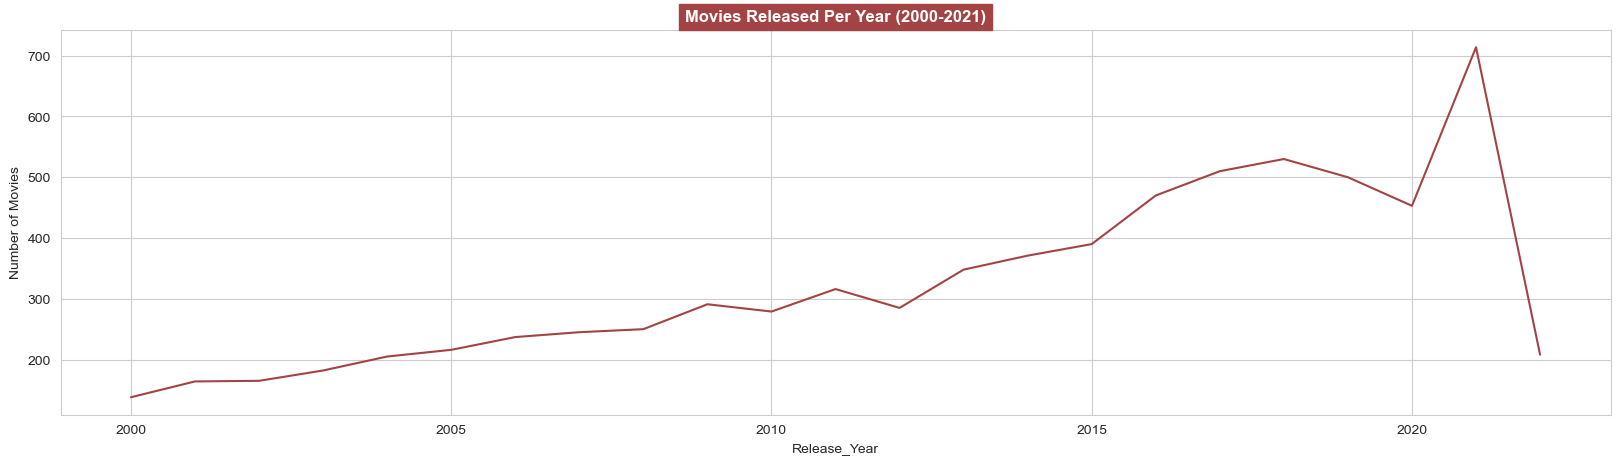

In [19]:
plt.figure(figsize=(20, 5))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, color='#A34343')
plt.ylabel('Number of Movies')
plt.title('Movies Released Per Year (2000-2021)', fontweight='bold',backgroundcolor='#A34343', color='white')
plt.show()

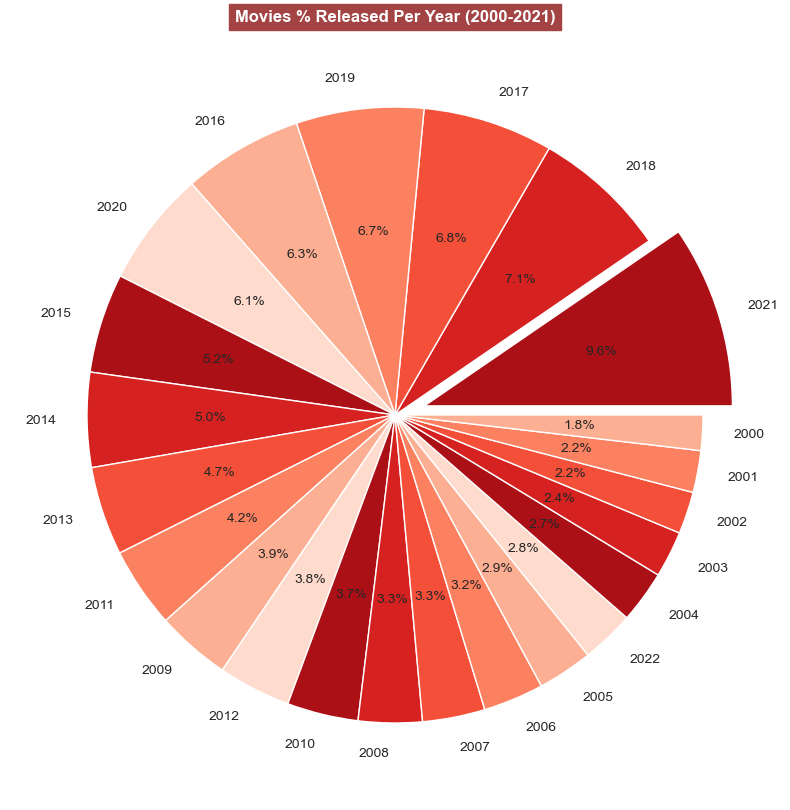

In [20]:
plt.figure(figsize =(10,10))
movies_per_year.plot(kind = 'pie', colors=sns.color_palette(palette='Reds_r'), autopct='%1.1f%%', explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.title('Movies % Released Per Year (2000-2021)', fontweight ='bold',backgroundcolor='#A34343', color='white')
plt.show()

In [21]:
movies_per_year.idxmax()

2021

In [22]:
movies_per_year.max()

714

-------------------------------------------------
Question 3: What is the most popular movie genre?

In [23]:
top_10_movie_genres = df['Genre'].value_counts().head(10)
top_10_movie_genres

Genre
Drama                     466
Comedy                    403
Drama, Romance            248
Horror                    238
Horror, Thriller          199
Comedy, Romance           196
Documentary               139
Comedy, Drama             137
Action, Thriller          125
Comedy, Drama, Romance    107
Name: count, dtype: int64

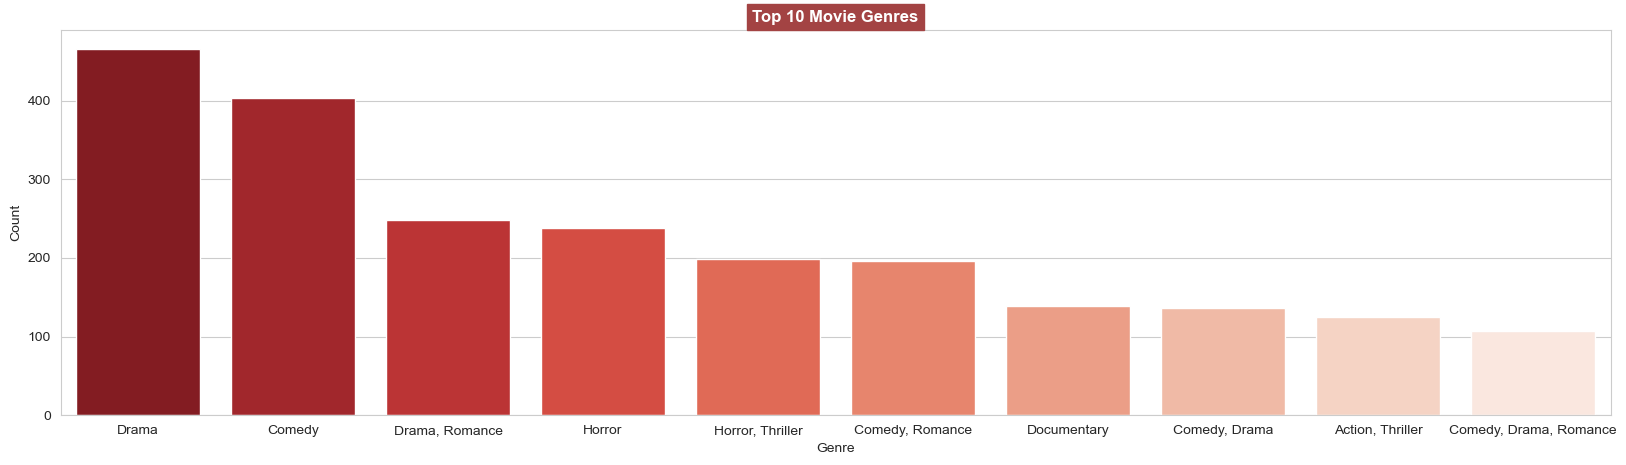

In [24]:
plt.figure(figsize=(20, 5))
sns.barplot(x=top_10_movie_genres.index, y=top_10_movie_genres.values, palette='Reds_r')
plt.ylabel('Count')
plt.title('Top 10 Movie Genres', fontweight='bold',backgroundcolor='#A34343', color='white')
plt.show()

In [25]:
top_10_movie_genres.idxmax()

'Drama'

In [26]:
top_10_movie_genres.max()

466

-----------------------------------------------------------
Question 4: What kind of movies take the highest rating?

In [27]:
highest_rating = df.sort_values(by='Vote_Count', ascending=False).head(10)
highest_rating

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year
380,Inception,127.131,31077,8.4,en,"Action, Science Fiction, Adventure",2010
461,Interstellar,110.531,27975,8.4,en,"Adventure, Drama, Science Fiction",2014
221,The Dark Knight,173.923,26994,8.5,en,"Drama, Action, Crime, Thriller",2008
138,The Avengers,229.772,26490,7.7,en,"Science Fiction, Action, Adventure",2012
195,Deadpool,189.206,26390,7.6,en,"Action, Adventure, Comedy",2016
92,Avatar,297.357,25011,7.5,en,"Action, Adventure, Fantasy, Science Fiction",2009
71,Avengers: Infinity War,338.402,24079,8.3,en,"Adventure, Action, Science Fiction",2018
1223,Guardians of the Galaxy,57.705,24024,7.9,en,"Action, Science Fiction, Adventure",2014
407,Fight Club,121.653,23620,8.4,en,Drama,1999
1312,Pulp Fiction,55.352,22733,8.5,en,"Thriller, Crime",1994


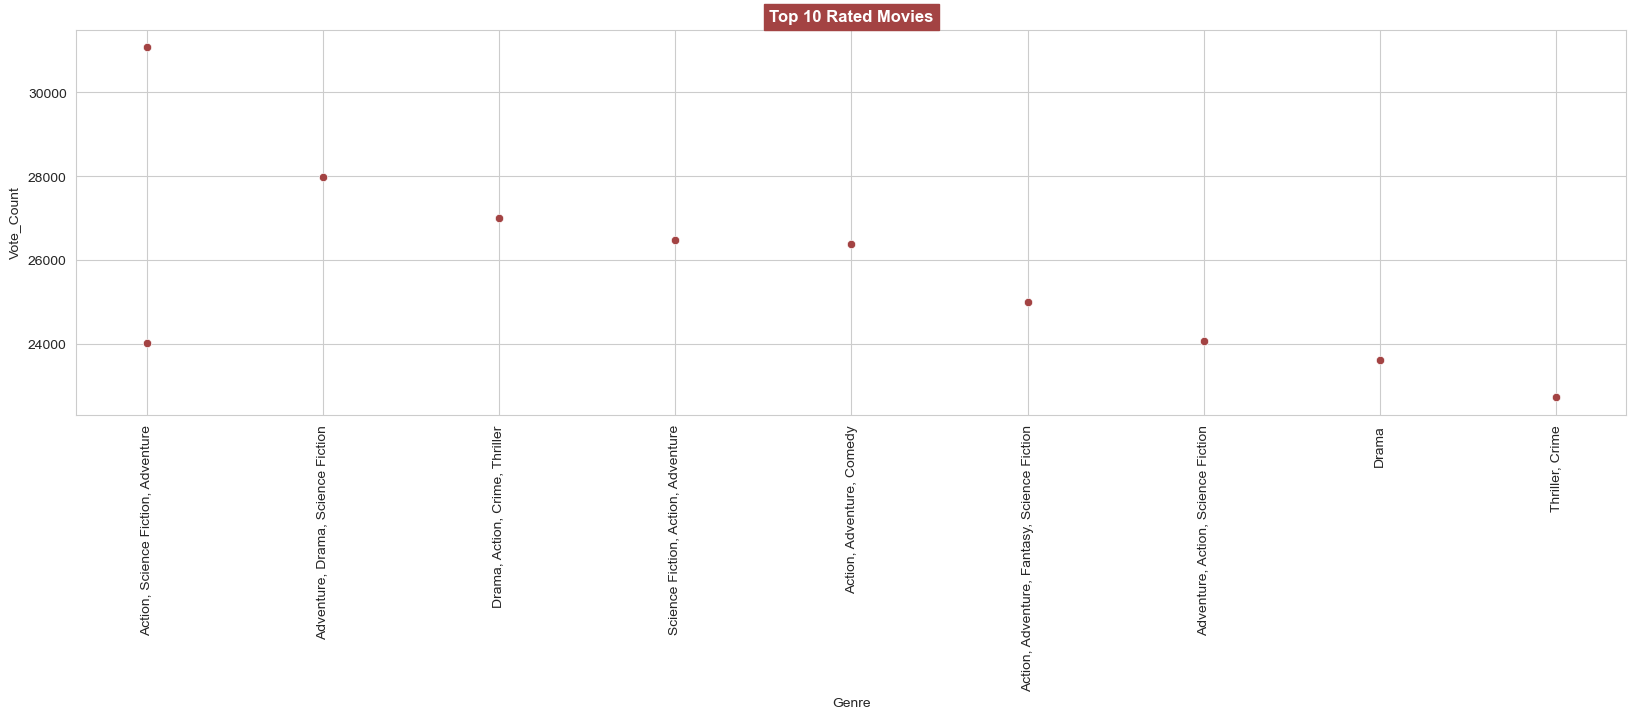

In [28]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Genre', y='Vote_Count', data=highest_rating, color='#A34343')
plt.xticks(rotation = 90)
plt.title('Top 10 Rated Movies', fontweight = 'bold',backgroundcolor = '#A34343', color= 'white')
plt.show()

In [29]:
highest_rating.reset_index(inplace=True)

In [30]:
highest_rating

,index,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year
0,380,Inception,127.131,31077,8.4,en,"Action, Science Fiction, Adventure",2010
1,461,Interstellar,110.531,27975,8.4,en,"Adventure, Drama, Science Fiction",2014
2,221,The Dark Knight,173.923,26994,8.5,en,"Drama, Action, Crime, Thriller",2008
3,138,The Avengers,229.772,26490,7.7,en,"Science Fiction, Action, Adventure",2012
4,195,Deadpool,189.206,26390,7.6,en,"Action, Adventure, Comedy",2016
5,92,Avatar,297.357,25011,7.5,en,"Action, Adventure, Fantasy, Science Fiction",2009
6,71,Avengers: Infinity War,338.402,24079,8.3,en,"Adventure, Action, Science Fiction",2018
7,1223,Guardians of the Galaxy,57.705,24024,7.9,en,"Action, Science Fiction, Adventure",2014
8,407,Fight Club,121.653,23620,8.4,en,Drama,1999
9,1312,Pulp Fiction,55.352,22733,8.5,en,"Thriller, Crime",1994


In [31]:
highest_rating.loc[0, 'Genre']

'Action, Science Fiction, Adventure'

-----------------------------------------------------
Question 5: Which movie is the most popular? Which movie is the least popular?

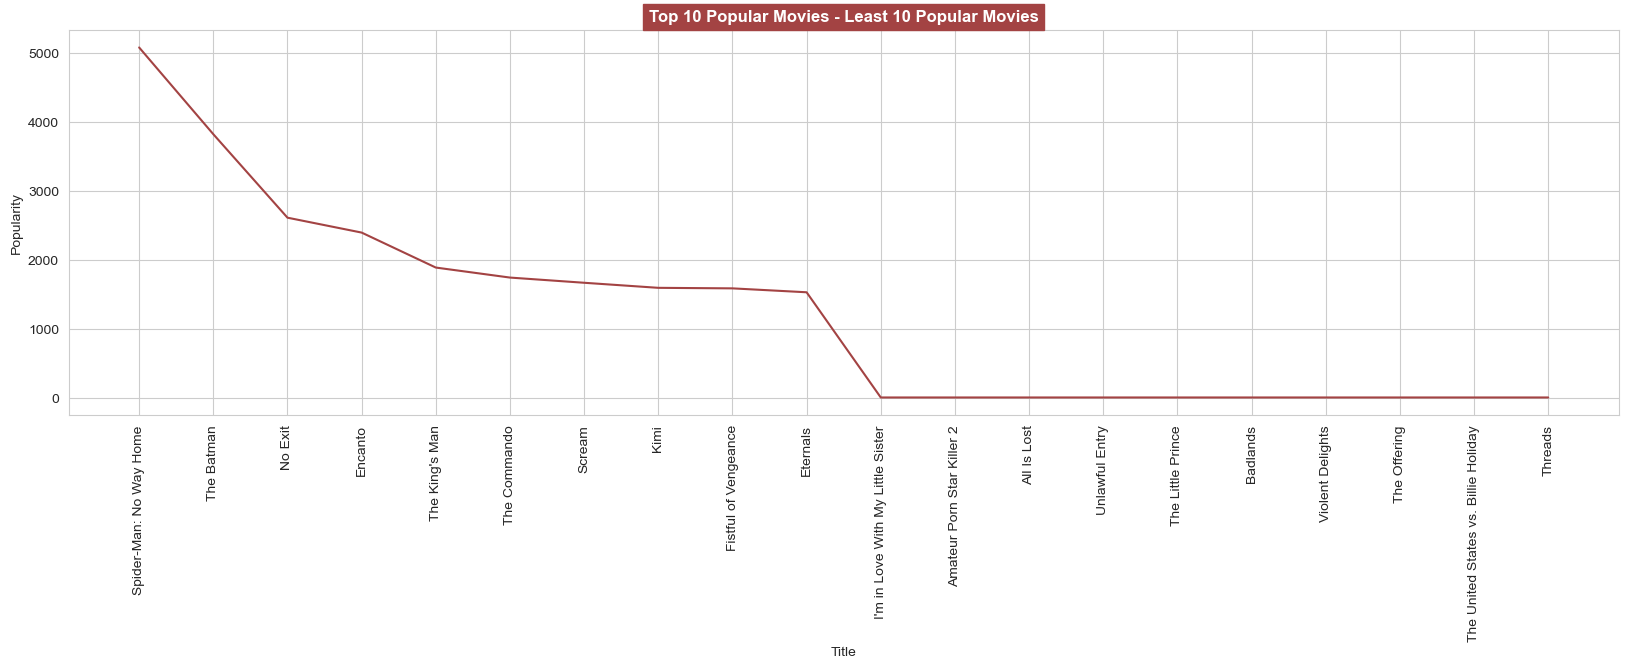

In [32]:
movies_sort = df.sort_values(by = 'Popularity', ascending = False)
head_tail_df = pd.concat([movies_sort.head(10), movies_sort.tail(10)])
plt.figure(figsize=(20, 5))
sns.lineplot(x='Title', y='Popularity', data=head_tail_df, color='#A34343')
plt.xticks(rotation = 90)
plt.title('Top 10 Popular Movies - Least 10 Popular Movies', fontweight = 'bold',backgroundcolor = '#A34343', color= 'white')
plt.show()

In [33]:
movies_sort.loc[0, 'Title']

'Spider-Man: No Way Home'

In [34]:
movies_sort.loc[9826, 'Title']

'Threads'